# Self Introduction 🙇‍♂️

Let me introduce myself 

In [1]:
# Install emoji module
!pip install emoji

In [2]:
# Import emoji module
import emoji

In [3]:
# Print Hello World
print(emoji.emojize('Hello World :snake:'))

Hello World 🐍


In [4]:
# Self-introduction
name = "Syafiq"
city = "Kuala Lumpur"
working_field = "tech"
character_1 = "left handed"
hobby_1 = "fishing"
hobby_2 = "cycling"
print(f"My name is {name}. \nI living in {city} 🇲🇾. \nMy daily job is the {working_field} guy 👨‍💻 working in the behind scene to make sure the resources capacity is working. \nIn my free time, i love to do {hobby_1} 🎣 and {hobby_2} 🚴 around the park.")

My name is Syafiq. 
I living in Kuala Lumpur 🇲🇾. 
My daily job is the tech guy 👨‍💻 working in the behind scene to make sure the resources capacity is working. 
In my free time, i love to do fishing 🎣 and cycling 🚴 around the park.


# Objectives 🎯

* Analyse choosen dataset 
* Cleaning the dataset
* Visualize the dataset based on specifics question

# Dataset 🎞️

This below the dataset choosen from kaggle.com is about netflix movies and tv-shows, read more this link before execute this below command ; https://www.kaggle.com/docs/api

`kaggle datasets download shivamb/netflix-shows`

# Preparation 🛠️

Before starting this EOD, will import first pandas, numpy and sidetable

In [5]:
# Import Pandas, Numpy and Sidetable as proper tool to analyse data
import pandas as pd
import numpy as np # for linear and algebra
import matplotlib.pyplot as plt # for plotting




Next, importing downloaded file from kaggle.

In [6]:
# Read the dataset as DataFrame into a variable named 'netflix'
netflix = pd.read_csv('netflix-shows.zip')

Checking type of the dataset we have.

In [7]:
# Inspect type of dataset
type(netflix)

pandas.core.frame.DataFrame

Lets try show top five information from dataset.

In [8]:
# Show the head of 'netflix' dataset
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Now to identify if the dataset true isn't missing from dataset.

In [9]:
# Identify true isn't missing information from dataset
netflix.notnull().head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,True,True,True,True,False,True,True,True,True,True,True,True
1,True,True,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,False,True,True,True,True,True,True
3,True,True,True,False,False,False,True,True,True,True,True,True
4,True,True,True,False,True,True,True,True,True,True,True,True


Now to identify if the dataset truly missing from dataset.

In [10]:
# Identify true missing information from dataset
netflix.isnull().head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


Let's understand the dataset shape row and columns.

In [11]:
# Identify dataset shape
netflix.shape

(8807, 12)

# Cleaning Time ☢️

We can do summary of the missing information from dataset below.

In [12]:
# Summary missing information from dataset
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Or more nicer with pro-tips! ✔️

In [13]:
# Summary of (pro-tips from Deeban) missing information from dataset
nacheck_netflix = pd.DataFrame(netflix.isnull().sum(), columns=['Count of Nulls'])                                                             
nacheck_netflix.index.name = 'Column'
nacheck_netflix.sort_values(['Count of Nulls'],ascending=False, inplace=True)
nacheck_netflix['Percentage']=(nacheck_netflix['Count of Nulls']/len(netflix))*100
print(nacheck_netflix)

              Count of Nulls  Percentage
Column                                  
director                2634   29.908028
country                  831    9.435676
cast                     825    9.367549
date_added                10    0.113546
rating                     4    0.045418
duration                   3    0.034064
show_id                    0    0.000000
type                       0    0.000000
title                      0    0.000000
release_year               0    0.000000
listed_in                  0    0.000000
description                0    0.000000


In [14]:
# Clean missing information on column "director", "cast", "country"
netflix.dropna(subset=['director','country','cast'], inplace=True)


In [15]:
# Verify after cleaning missing information
check_null = pd.DataFrame(netflix.isnull().sum(), columns=['Count of Nulls'])                                                             
check_null.index.name = 'Column'
check_null.sort_values(['Count of Nulls'],ascending=False, inplace=True)
check_null['Percentage']=(check_null['Count of Nulls']/len(netflix))*100
print(check_null)


              Count of Nulls  Percentage
Column                                  
duration                   3    0.056222
rating                     1    0.018741
show_id                    0    0.000000
type                       0    0.000000
title                      0    0.000000
director                   0    0.000000
cast                       0    0.000000
country                    0    0.000000
date_added                 0    0.000000
release_year               0    0.000000
listed_in                  0    0.000000
description                0    0.000000


Next only remove specific unwanted column.

In [16]:
# Remove column "description"
netflix_clean_col = netflix.drop(columns= ['description'], inplace=True)


In [17]:
# Show first 10
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy"
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas"
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"


Before starting creating function, the overall dataset has less numerical and more containing strings. Above top 5 information has rating mixed with type of tv-shows and movies. Lets start with column "rating" and "type" to find the unique.

In [18]:
# Finding unique on column "rating"
netflix['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR', nan], dtype=object)

In [19]:
# Finding unique on column "type"
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Based from observation the rating is mixed with "movie" and "tv-show", let's filter each in same column.

In [20]:
# filter "TV Show" from column "type" with column "rating"
netflix[netflix['type']=='Movie']['rating'].unique()

array(['TV-MA', 'PG-13', 'TV-14', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR', nan], dtype=object)

In [21]:
# filter "TV Show" from column "type" with column "rating"
netflix[netflix['type']=='TV Show']['rating'].unique()

array(['TV-14', 'TV-MA', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7'], dtype=object)

Next, we clean column "rating" for more simplify based on targeted user such kid, teen, young adult and adult. More information (global list) on this link ; https://en.wikipedia.org/wiki/Television_content_rating_system. 

In [22]:
# Clean column "rating" more simplify categorize based on user targeted
rating_users = {
    'PG-13' : 'Teen',
    'PG' : 'Teen',
    'TV-MA' : 'Adult',
    'TV-PG' : 'Young Adult',
    'TV-14' : 'Teen',
    'TV-Y' : 'Kids',
    'R' : 'Young Adult',
    'TV-G' : 'Teen',
    'TV-Y7' : 'Teen',
    'G' : 'Kids',
    'NC-17' : 'Adult',
    'NR': 'Adult',
    'TV-Y7-FV' : 'Adult',
    'UR' : 'Adult',
    '74 min' : 'Invalid_Rating',
    '84 min' : 'Invalid_Rating',
    '66 min' : 'Invalid_Rating'
            
}

In [23]:
# Replace above value to column "Rating"
netflix['rating_targeted'] = netflix['rating'].replace(rating_users)

In [24]:
# Find unique on new renaming column "rating_targeted"
netflix['rating_targeted'].unique()

array(['Adult', 'Teen', 'Young Adult', 'Kids', 'Invalid_Rating', nan],
      dtype=object)

In [25]:
# Inspect random sample from "rating_targeted"
netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,rating_targeted
3670,s3671,Movie,Cities of Last Things,Wi Ding Ho,"Jack Kao, Lee Hong-chi, Louise Grinberg, Huang...","Taiwan, China, France, United States","July 12, 2019",2018,TV-MA,106 min,"Dramas, Independent Movies, International Movies",Adult
6502,s6503,Movie,Clouds of Sils Maria,Olivier Assayas,"Juliette Binoche, Kristen Stewart, Chloë Grace...","France, Germany, Switzerland","February 12, 2017",2014,R,124 min,"Dramas, International Movies",Young Adult
8188,s8189,Movie,The Amityville Horror,Andrew Douglas,"Ryan Reynolds, Melissa George, Chloë Grace Mor...",United States,"January 1, 2020",2005,R,89 min,Horror Movies,Young Adult
4850,s4851,Movie,Ibiza,Alex Richanbach,"Gillian Jacobs, Vanessa Bayer, Phoebe Robinson...",United States,"May 25, 2018",2018,TV-MA,94 min,"Comedies, Romantic Movies",Adult
7174,s7175,Movie,Kay Dyache Bola,Chandrakant Kulkarni,"Makarand Anaspure, Akshay Pendse, Umesh Kamat,...",India,"January 1, 2018",2005,TV-14,133 min,"Comedies, Dramas, International Movies",Teen


Another column to be clean is column "country" and find if there is duplicated.

In [26]:
# find the length unique of column "country"
len(netflix['country'].unique())

604

In [27]:
# find duplicated on column "country"
check_dedup = netflix.duplicated(subset='country', keep='first')
check_dedup

7       False
8       False
9       False
12      False
24      False
        ...  
8801    False
8802     True
8804     True
8805     True
8806     True
Length: 5336, dtype: bool

In [28]:
clean_dedup = netflix.duplicated(subset=['country'], keep=False)
clean_dedup

7       False
8        True
9        True
12      False
24       True
        ...  
8801    False
8802     True
8804     True
8805     True
8806     True
Length: 5336, dtype: bool

# Get clean data from this jupyter book 📂

In [29]:
# Export data as a CSV file
netflix.to_csv('clean_netflix_df.csv')

# Case Study #1 🤔

Question : Analyse top countries by rating for movie and TV show ❓

In [30]:
# find frequency of new column created as "rating_targeted"
netflix['rating_targeted'].describe()

count     5335
unique       5
top       Teen
freq      2119
Name: rating_targeted, dtype: object

Text(0.5, 1.0, 'No. of Movies and TV shows vs Rating Targeted in Netflix')

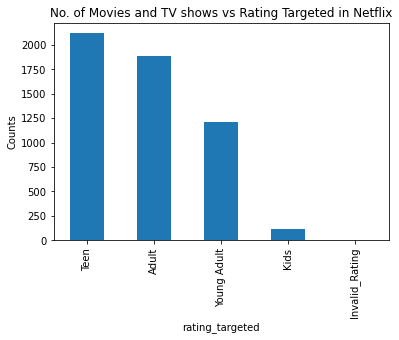

In [31]:
# Find occurrence in column rating_targeted and plot as histrogram 
netflix['rating_targeted'].value_counts(dropna=True).head().plot(kind='bar')
plt.xlabel('rating_targeted')
plt.ylabel('Counts')
plt.title('No. of Movies and TV shows vs Rating Targeted in Netflix')

# Case Study #2 🤔

Question : Analyse top cast acting for movie and TV show in Netflix ❓

In [32]:
# find frequency of column "cast"
netflix['cast'].describe()

count            5336
unique           5202
top       Samuel West
freq               10
Name: cast, dtype: object

Text(0.5, 1.0, 'Top 5 Cast Acting in Netflix on Movies and TV Shows')

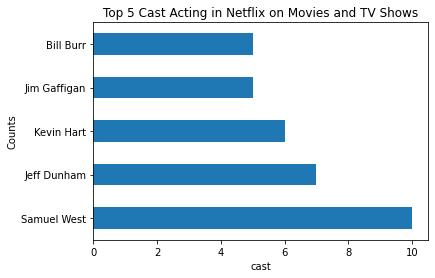

In [33]:
# Find occurrence in column cast and plot as histrogram 
netflix['cast'].value_counts().head().plot(kind='barh')
plt.xlabel('cast')
plt.ylabel('Counts')
plt.title('Top 5 Cast Acting in Netflix on Movies and TV Shows')



# Case Study #3 🤔

Question : Analyse which countries producing "horror" 👻 contents movie/tv-show on Netflix ❓

Text(0.5, 1.0, 'Top 5 Countries producing "Horror" contents Movie/TV Shows')

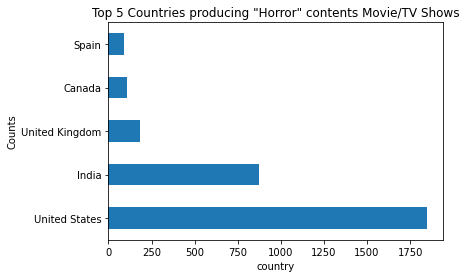

In [34]:
# creating filter using str contains and plot as histogram
filtered_horror = netflix[netflix['listed_in'].str.contains('Horror')]
netflix['country'].value_counts().head().plot(kind='barh')
plt.xlabel('country')
plt.ylabel('Counts')
plt.title('Top 5 Countries producing "Horror" contents Movie/TV Shows')


# You want hear something 👀 ?

In [35]:
# Install playsound module
!pip install playsound==1.2.2

In [36]:
# importing playsound module
from playsound import playsound

In [37]:
# Creating simple function with module playsound
def letsplay():

    # 
    while True:
        yourname = input("What is your name? ")

        try:
            trythis = input("Do You Want To Hear Something? [y/n]: ") == "y"

        # error exception.
        except Error:
            # exception cycle will go around until validated
            print("Error! Try again.")

        # When successfully it will play the thing
        else:
            playsound('./playthis.mp3')
            print(yourname, ", Sound Familiar Right?" )
            # song
            break

# The function is called
letsplay()

What is your name? John Doe
Do You Want To Hear Something? [y/n]: y
John Doe , Sound Familiar Right?


# Conclusion

This study show Netflix 📽️ data able to capture on specific case studies and emphasize python programming in better manner. It can be given by different interpretation and analysis for the audience understand each segment. Although the data captured has less numericals and it able sorting by proper modules or methods can be done. By doing to clean the data, it able to interpret best method to ensure every analysis not mixed with unwanted information.

Thank you! 